In [ ]:
!unzip '/content/drive/MyDrive/book/CV1/Ch3/Houses Dataset.zip'

In [ ]:
import pandas as pd
cols = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
df = pd.read_csv('/content/Houses Dataset/HousesInfo.txt', sep=" ", header=None, names=cols)

In [ ]:
df.head()

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226


In [ ]:
import os
import glob
import numpy as np
import cv2

In [ ]:
 #combining all the four images into one image


images=[]
for i in df.index.values:
  bpath = os.path.sep.join(['/content/Houses Dataset', "{}_*".format(i + 1)])
  hpath = sorted(list(glob.glob(bpath)))
  inp_img = []
  out_img = np.zeros((64, 64, 3))
  for j in hpath:
    image = cv2.imread(j)
    image = cv2.resize(image, (32, 32))
    inp_img.append(image)
  out_img[0:32, 0:32] = inp_img[0]
  out_img[0:32, 32:64] = inp_img[1]
  out_img[32:64, 32:64] = inp_img[2]
  out_img[32:64, 0:32] = inp_img[3]
  images.append(out_img)


In [ ]:
images[15]

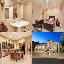

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[15])

In [ ]:
images=np.array(images)
images=images/255.0


In [ ]:
from sklearn.model_selection import train_test_split
train_attr, test_attr, train_img, test_img=train_test_split(df, images, test_size=0.25)

In [ ]:
trainY = train_attr["price"] / df["price"].max()
testY = test_attr["price"] / df["price"].max()

In [ ]:
trainY

490    0.074940
315    0.082793
181    0.083646
465    0.051195
309    0.069973
         ...   
471    0.029874
389    0.026374
478    0.030710
331    0.038409
202    0.168658
Name: price, Length: 401, dtype: float64

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Sequential

In [ ]:
input_shape=images[0].shape
input_shape

(64, 64, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1))

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mse", optimizer=opt)

In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=200, batch_size=8)

Epoch 1/200
51/51 [==============================] - 13s 10ms/step - loss: 5.3075 - val_loss: 0.3550
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 1.5206 - val_loss: 0.0319
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 0.9296 - val_loss: 0.0402
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4602 - val_loss: 0.0365
Epoch 5/200
51/51 [==============================] - 0s 5ms/step - loss: 0.5186 - val_loss: 0.0937
Epoch 6/200
51/51 [==============================] - 0s 5ms/step - loss: 0.5298 - val_loss: 0.0707
Epoch 7/200
51/51 [==============================] - 0s 5ms/step - loss: 0.5252 - val_loss: 0.3025
Epoch 8/200
51/51 [==============================] - 0s 5ms/step - loss: 1.0618 - val_loss: 0.2650
Epoch 9/200
51/51 [==============================] - 0s 5ms/step - loss: 0.5059 - val_loss: 0.0755
Epoch 10/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1539 - val_loss: 0.1555
Epoch 1

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=200, batch_size=8)

Epoch 1/200
51/51 [==============================] - 5s 59ms/step - loss: 1.5147 - val_loss: 1.4562
Epoch 2/200
51/51 [==============================] - 3s 56ms/step - loss: 0.8159 - val_loss: 8.2816
Epoch 3/200
51/51 [==============================] - 3s 54ms/step - loss: 0.5081 - val_loss: 17.8660
Epoch 4/200
51/51 [==============================] - 3s 56ms/step - loss: 0.3482 - val_loss: 27.8767
Epoch 5/200
51/51 [==============================] - 3s 54ms/step - loss: 0.2933 - val_loss: 97.9645
Epoch 6/200
51/51 [==============================] - 3s 54ms/step - loss: 0.2194 - val_loss: 79.3252
Epoch 7/200
51/51 [==============================] - 3s 55ms/step - loss: 0.1269 - val_loss: 34.1641
Epoch 8/200
51/51 [==============================] - 3s 55ms/step - loss: 0.0972 - val_loss: 10.1895
Epoch 9/200
51/51 [==============================] - 3s 55ms/step - loss: 0.0963 - val_loss: 2.0394
Epoch 10/200
51/51 [==============================] - 3s 56ms/step - loss: 0.0954 - val_loss: 

In [ ]:
from sklearn.metrics import r2_score
r2_score(testY, model.predict(test_img))

-0.009226713528973418

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 5s 64ms/step - loss: 1.7148 - val_loss: 0.1675
Epoch 2/100
51/51 [==============================] - 3s 54ms/step - loss: 0.7349 - val_loss: 1.5506
Epoch 3/100
51/51 [==============================] - 3s 54ms/step - loss: 0.5047 - val_loss: 1.2857
Epoch 4/100
51/51 [==============================] - 3s 53ms/step - loss: 0.2944 - val_loss: 0.7774
Epoch 5/100
51/51 [==============================] - 3s 53ms/step - loss: 0.2373 - val_loss: 0.8171
Epoch 6/100
51/51 [==============================] - 3s 53ms/step - loss: 0.1765 - val_loss: 1.5068
Epoch 7/100
51/51 [==============================] - 3s 54ms/step - loss: 0.1286 - val_loss: 2.3656
Epoch 8/100
51/51 [==============================] - 3s 53ms/step - loss: 0.1208 - val_loss: 2.7613
Epoch 9/100
51/51 [==============================] - 3s 53ms/step - loss: 0.1048 - val_loss: 1.1115
Epoch 10/100
51/51 [==============================] - 3s 53ms/step - loss: 0.0793 - val_loss: 0.2245

In [ ]:
r2_score(testY, model.predict(test_img))

0.019786749766424583

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=1e-3)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 5s 67ms/step - loss: 0.7542 - val_loss: 0.0083
Epoch 2/100
51/51 [==============================] - 5s 102ms/step - loss: 0.4538 - val_loss: 1.4071
Epoch 3/100
51/51 [==============================] - 5s 94ms/step - loss: 0.2219 - val_loss: 3.5442
Epoch 4/100
51/51 [==============================] - 4s 78ms/step - loss: 0.1551 - val_loss: 4.5091
Epoch 5/100
51/51 [==============================] - 3s 55ms/step - loss: 0.1436 - val_loss: 4.7697
Epoch 6/100
51/51 [==============================] - 3s 56ms/step - loss: 0.0874 - val_loss: 4.1931
Epoch 7/100
51/51 [==============================] - 3s 55ms/step - loss: 0.0832 - val_loss: 1.2799
Epoch 8/100
51/51 [==============================] - 3s 54ms/step - loss: 0.0662 - val_loss: 1.1934
Epoch 9/100
51/51 [==============================] - 3s 55ms/step - loss: 0.0570 - val_loss: 0.6959
Epoch 10/100
51/51 [==============================] - 3s 55ms/step - loss: 0.0526 - val_loss: 0.279

In [ ]:
r2_score(testY, model.predict(test_img))

0.0687504994113527

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

model.compile(loss="mse", optimizer='adam')

In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 5s 67ms/step - loss: 1.6625 - val_loss: 0.0566
Epoch 2/100
51/51 [==============================] - 3s 59ms/step - loss: 0.7796 - val_loss: 0.2402
Epoch 3/100
51/51 [==============================] - 3s 59ms/step - loss: 0.3322 - val_loss: 0.4052
Epoch 4/100
51/51 [==============================] - 3s 58ms/step - loss: 0.1888 - val_loss: 0.4237
Epoch 5/100
51/51 [==============================] - 3s 58ms/step - loss: 0.1300 - val_loss: 0.2898
Epoch 6/100
51/51 [==============================] - 3s 60ms/step - loss: 0.1225 - val_loss: 0.1911
Epoch 7/100
51/51 [==============================] - 3s 59ms/step - loss: 0.0962 - val_loss: 0.3774
Epoch 8/100
51/51 [==============================] - 3s 59ms/step - loss: 0.0740 - val_loss: 0.4629
Epoch 9/100
51/51 [==============================] - 3s 58ms/step - loss: 0.0775 - val_loss: 0.3353
Epoch 10/100
51/51 [==============================] - 3s 58ms/step - loss: 0.0708 - val_loss: 0.0978

In [ ]:
r2_score(testY, model.predict(test_img))

0.05194306458994058

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

In [ ]:
opt = Adam(lr=1e-3)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 6s 81ms/step - loss: 1.1869 - val_loss: 0.0505
Epoch 2/100
51/51 [==============================] - 4s 75ms/step - loss: 0.7216 - val_loss: 0.1459
Epoch 3/100
51/51 [==============================] - 4s 76ms/step - loss: 0.5032 - val_loss: 0.2737
Epoch 4/100
51/51 [==============================] - 4s 76ms/step - loss: 0.4172 - val_loss: 0.1393
Epoch 5/100
51/51 [==============================] - 4s 76ms/step - loss: 0.3654 - val_loss: 0.0144
Epoch 6/100
51/51 [==============================] - 4s 77ms/step - loss: 0.1933 - val_loss: 0.0088
Epoch 7/100
51/51 [==============================] - 4s 76ms/step - loss: 0.2080 - val_loss: 0.0142
Epoch 8/100
51/51 [==============================] - 4s 77ms/step - loss: 0.1557 - val_loss: 0.0238
Epoch 9/100
51/51 [==============================] - 4s 76ms/step - loss: 0.1468 - val_loss: 0.0290
Epoch 10/100
51/51 [==============================] - 4s 76ms/step - loss: 0.0888 - val_loss: 0.0188

In [ ]:
r2_score(testY, model.predict(test_img))

-0.005016115754428618

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=1e-3)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 5s 67ms/step - loss: 1.3838 - val_loss: 0.3916
Epoch 2/100
51/51 [==============================] - 3s 60ms/step - loss: 0.4785 - val_loss: 1.4956
Epoch 3/100
51/51 [==============================] - 3s 61ms/step - loss: 0.2917 - val_loss: 3.4550
Epoch 4/100
51/51 [==============================] - 3s 61ms/step - loss: 0.1541 - val_loss: 8.3233
Epoch 5/100
51/51 [==============================] - 3s 63ms/step - loss: 0.1202 - val_loss: 15.4115
Epoch 6/100
51/51 [==============================] - 3s 63ms/step - loss: 0.1188 - val_loss: 20.3426
Epoch 7/100
51/51 [==============================] - 3s 63ms/step - loss: 0.0752 - val_loss: 11.8363
Epoch 8/100
51/51 [==============================] - 3s 64ms/step - loss: 0.0515 - val_loss: 4.9831
Epoch 9/100
51/51 [==============================] - 3s 63ms/step - loss: 0.0445 - val_loss: 0.5851
Epoch 10/100
51/51 [==============================] - 3s 63ms/step - loss: 0.0423 - val_loss: 0.0

In [ ]:
r2_score(testY, model.predict(test_img))

0.021868309325592583

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop
opt = RMSprop(lr=1e-3)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 7s 66ms/step - loss: 0.7443 - val_loss: 0.0175
Epoch 2/100
51/51 [==============================] - 3s 61ms/step - loss: 0.4158 - val_loss: 0.0199
Epoch 3/100
51/51 [==============================] - 3s 61ms/step - loss: 0.2608 - val_loss: 0.0190
Epoch 4/100
51/51 [==============================] - 3s 62ms/step - loss: 0.1508 - val_loss: 0.0147
Epoch 5/100
51/51 [==============================] - 3s 62ms/step - loss: 0.0824 - val_loss: 0.0111
Epoch 6/100
51/51 [==============================] - 3s 61ms/step - loss: 0.0682 - val_loss: 0.0120
Epoch 7/100
51/51 [==============================] - 3s 62ms/step - loss: 0.0470 - val_loss: 0.1262
Epoch 8/100
51/51 [==============================] - 3s 63ms/step - loss: 0.0232 - val_loss: 0.0880
Epoch 9/100
51/51 [==============================] - 3s 62ms/step - loss: 0.0208 - val_loss: 0.0422
Epoch 10/100
51/51 [==============================] - 3s 63ms/step - loss: 0.0164 - val_loss: 0.0046

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop
opt = RMSprop(lr=1e-2)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 5s 67ms/step - loss: 0.5884 - val_loss: 0.0085
Epoch 2/100
51/51 [==============================] - 3s 64ms/step - loss: 0.0348 - val_loss: 0.0104
Epoch 3/100
51/51 [==============================] - 3s 62ms/step - loss: 0.0153 - val_loss: 0.0068
Epoch 4/100
51/51 [==============================] - 3s 63ms/step - loss: 0.0097 - val_loss: 0.0186
Epoch 5/100
51/51 [==============================] - 3s 63ms/step - loss: 0.0093 - val_loss: 7.9317
Epoch 6/100
51/51 [==============================] - 3s 63ms/step - loss: 0.0091 - val_loss: 0.0368
Epoch 7/100
51/51 [==============================] - 3s 64ms/step - loss: 0.0088 - val_loss: 0.0046
Epoch 8/100
51/51 [==============================] - 3s 63ms/step - loss: 0.0087 - val_loss: 0.0045
Epoch 9/100
51/51 [==============================] - 3s 62ms/step - loss: 0.0088 - val_loss: 0.0045
Epoch 10/100
51/51 [==============================] - 6s 110ms/step - loss: 0.0088 - val_loss: 0.005

In [ ]:
r2_score(testY,model.predict(test_img))

0.20394307389524746

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

In [ ]:
opt = RMSprop(lr=1e-1)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 6s 65ms/step - loss: 0.1032 - val_loss: 0.0134
Epoch 2/100
51/51 [==============================] - 3s 60ms/step - loss: 0.0119 - val_loss: 0.0074
Epoch 3/100
51/51 [==============================] - 3s 63ms/step - loss: 0.0127 - val_loss: 0.3819
Epoch 4/100
51/51 [==============================] - 3s 61ms/step - loss: 0.0113 - val_loss: 0.0614
Epoch 5/100
51/51 [==============================] - 3s 62ms/step - loss: 0.0118 - val_loss: 0.0098
Epoch 6/100
51/51 [==============================] - 3s 62ms/step - loss: 0.0116 - val_loss: 0.0061
Epoch 7/100
51/51 [==============================] - 3s 61ms/step - loss: 0.0121 - val_loss: 0.0650
Epoch 8/100
51/51 [==============================] - 3s 61ms/step - loss: 0.0124 - val_loss: 0.0070
Epoch 9/100
51/51 [==============================] - 3s 62ms/step - loss: 0.0123 - val_loss: 0.0152
Epoch 10/100
51/51 [==============================] - 3s 61ms/step - loss: 0.0115 - val_loss: 0.0771

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="valid", activation = 'relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="valid", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="valid", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

In [ ]:
opt = RMSprop(lr=1e-2)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 5s 57ms/step - loss: 0.4243 - val_loss: 0.2787
Epoch 2/100
51/51 [==============================] - 3s 52ms/step - loss: 0.0315 - val_loss: 0.0047
Epoch 3/100
51/51 [==============================] - 3s 53ms/step - loss: 0.0112 - val_loss: 0.0050
Epoch 4/100
51/51 [==============================] - 3s 52ms/step - loss: 0.0093 - val_loss: 0.0044
Epoch 5/100
51/51 [==============================] - 3s 53ms/step - loss: 0.0088 - val_loss: 0.0049
Epoch 6/100
51/51 [==============================] - 3s 52ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 7/100
51/51 [==============================] - 3s 53ms/step - loss: 0.0107 - val_loss: 0.0045
Epoch 8/100
51/51 [==============================] - 3s 54ms/step - loss: 0.0089 - val_loss: 0.0046
Epoch 9/100
51/51 [==============================] - 3s 53ms/step - loss: 0.0088 - val_loss: 0.0044
Epoch 10/100
51/51 [==============================] - 3s 52ms/step - loss: 0.0087 - val_loss: 0.0054

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

In [ ]:
opt = RMSprop(lr=1e-3)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:

model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 6s 76ms/step - loss: 0.5494 - val_loss: 0.0318
Epoch 2/100
51/51 [==============================] - 4s 70ms/step - loss: 0.2866 - val_loss: 0.0187
Epoch 3/100
51/51 [==============================] - 4s 69ms/step - loss: 0.1651 - val_loss: 0.0070
Epoch 4/100
51/51 [==============================] - 4s 70ms/step - loss: 0.0731 - val_loss: 0.0173
Epoch 5/100
51/51 [==============================] - 4s 69ms/step - loss: 0.0863 - val_loss: 0.0402
Epoch 6/100
51/51 [==============================] - 4s 70ms/step - loss: 0.0410 - val_loss: 0.0837
Epoch 7/100
51/51 [==============================] - 4s 70ms/step - loss: 0.0378 - val_loss: 0.0068
Epoch 8/100
51/51 [==============================] - 3s 69ms/step - loss: 0.0400 - val_loss: 0.0061
Epoch 9/100
51/51 [==============================] - 4s 70ms/step - loss: 0.0337 - val_loss: 0.0049
Epoch 10/100
51/51 [==============================] - 4s 70ms/step - loss: 0.0261 - val_loss: 0.0127

In [ ]:
r2_score(testY, model.predict(test_img))

0.283972993818969

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

In [ ]:
opt = RMSprop(lr=1e-2)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 6s 76ms/step - loss: 0.6330 - val_loss: 0.1556
Epoch 2/100
51/51 [==============================] - 4s 71ms/step - loss: 0.0451 - val_loss: 0.0053
Epoch 3/100
51/51 [==============================] - 4s 71ms/step - loss: 0.0264 - val_loss: 0.0312
Epoch 4/100
51/51 [==============================] - 4s 74ms/step - loss: 0.0194 - val_loss: 0.0429
Epoch 5/100
51/51 [==============================] - 4s 75ms/step - loss: 0.0092 - val_loss: 0.2104
Epoch 6/100
51/51 [==============================] - 4s 73ms/step - loss: 0.0107 - val_loss: 0.0380
Epoch 7/100
51/51 [==============================] - 4s 72ms/step - loss: 0.0088 - val_loss: 4.3108
Epoch 8/100
51/51 [==============================] - 4s 75ms/step - loss: 0.0090 - val_loss: 0.0046
Epoch 9/100
51/51 [==============================] - 4s 76ms/step - loss: 0.0102 - val_loss: 0.0125
Epoch 10/100
51/51 [==============================] - 4s 73ms/step - loss: 0.0093 - val_loss: 0.0071

In [ ]:
r2_score(testY, model.predict(test_img))

-0.14282303606566193

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))



In [ ]:
opt = RMSprop(lr=1e-3)
model.compile(loss="mse", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 11s 105ms/step - loss: 2.1463 - val_loss: 0.0046
Epoch 2/100
51/51 [==============================] - 5s 96ms/step - loss: 1.7930 - val_loss: 0.1290
Epoch 3/100
51/51 [==============================] - 5s 104ms/step - loss: 0.9853 - val_loss: 0.0871
Epoch 4/100
51/51 [==============================] - 5s 94ms/step - loss: 0.8994 - val_loss: 0.0394
Epoch 5/100
51/51 [==============================] - 5s 96ms/step - loss: 0.4775 - val_loss: 0.3342
Epoch 6/100
51/51 [==============================] - 5s 95ms/step - loss: 0.3449 - val_loss: 0.2671
Epoch 7/100
51/51 [==============================] - 5s 96ms/step - loss: 0.2087 - val_loss: 0.7358
Epoch 8/100
51/51 [==============================] - 5s 97ms/step - loss: 0.1621 - val_loss: 0.3922
Epoch 9/100
51/51 [==============================] - 5s 97ms/step - loss: 0.1223 - val_loss: 0.1066
Epoch 10/100
51/51 [==============================] - 5s 94ms/step - loss: 0.0584 - val_loss: 0.0

In [ ]:
r2_score(testY, model.predict(test_img))

-2.172753401393491

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))
#model.summary()

In [ ]:
opt = RMSprop(lr=1e-3)
model.compile(loss="mse", optimizer=opt)
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=200, batch_size=8)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


51/51 [==============================] - 3s 15ms/step - loss: 1.6066 - val_loss: 0.0279
Epoch 2/200
51/51 [==============================] - 1s 10ms/step - loss: 0.7884 - val_loss: 0.0366
Epoch 3/200
51/51 [==============================] - 1s 10ms/step - loss: 0.4250 - val_loss: 0.0401
Epoch 4/200
51/51 [==============================] - 1s 10ms/step - loss: 0.3925 - val_loss: 0.0434
Epoch 5/200
51/51 [==============================] - 1s 11ms/step - loss: 0.2783 - val_loss: 0.0412
Epoch 6/200
51/51 [==============================] - 1s 11ms/step - loss: 0.1522 - val_loss: 0.0338
Epoch 7/200
51/51 [==============================] - 1s 10ms/step - loss: 0.1042 - val_loss: 0.0253
Epoch 8/200
51/51 [==============================] - 1s 10ms/step - loss: 0.0674 - val_loss: 0.0189
Epoch 9/200
51/51 [==============================] - 1s 10ms/step - loss: 0.0533 - val_loss: 0.0157
Epoch 10/200
51/51 [==============================] - 1s 10ms/step - loss: 0.0435 - val_loss: 0.0169
Epoch 11/20

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))
#model.summary()

In [ ]:
opt = RMSprop(lr=1e-3)
model.compile(loss="mse", optimizer=opt)
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=250, batch_size=8)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


51/51 [==============================] - 4s 15ms/step - loss: 3.3924 - val_loss: 0.0247
Epoch 2/250
51/51 [==============================] - 1s 11ms/step - loss: 2.0506 - val_loss: 0.0293
Epoch 3/250
51/51 [==============================] - 1s 10ms/step - loss: 1.2544 - val_loss: 0.4468
Epoch 4/250
51/51 [==============================] - 1s 11ms/step - loss: 0.8046 - val_loss: 0.0897
Epoch 5/250
51/51 [==============================] - 1s 10ms/step - loss: 0.5090 - val_loss: 0.0336
Epoch 6/250
51/51 [==============================] - 1s 10ms/step - loss: 0.3440 - val_loss: 0.0451
Epoch 7/250
51/51 [==============================] - 1s 10ms/step - loss: 0.2623 - val_loss: 0.0371
Epoch 8/250
51/51 [==============================] - 1s 10ms/step - loss: 0.1215 - val_loss: 0.3294
Epoch 9/250
51/51 [==============================] - 1s 10ms/step - loss: 0.0907 - val_loss: 0.0662
Epoch 10/250
51/51 [==============================] - 1s 10ms/step - loss: 0.0854 - val_loss: 0.0271
Epoch 11/25

In [ ]:
from sklearn.metrics import r2_score


r2_score(testY, model.predict(test_img))

0.12751589743531289

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))
#model.summary()

In [ ]:
opt = RMSprop(lr=1e-3)
model.compile(loss="mse", optimizer=opt)
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=250, batch_size=8)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


51/51 [==============================] - 3s 15ms/step - loss: 2.2745 - val_loss: 0.1287
Epoch 2/250
51/51 [==============================] - 1s 10ms/step - loss: 1.3796 - val_loss: 0.2769
Epoch 3/250
51/51 [==============================] - 1s 11ms/step - loss: 1.2558 - val_loss: 0.1734
Epoch 4/250
51/51 [==============================] - 1s 10ms/step - loss: 0.9104 - val_loss: 0.3933
Epoch 5/250
51/51 [==============================] - 1s 10ms/step - loss: 0.5595 - val_loss: 1.9253
Epoch 6/250
51/51 [==============================] - 1s 11ms/step - loss: 0.4751 - val_loss: 1.0751
Epoch 7/250
51/51 [==============================] - 1s 11ms/step - loss: 0.3812 - val_loss: 0.3684
Epoch 8/250
51/51 [==============================] - 1s 10ms/step - loss: 0.2337 - val_loss: 0.3502
Epoch 9/250
51/51 [==============================] - 1s 10ms/step - loss: 0.1481 - val_loss: 0.2831
Epoch 10/250
51/51 [==============================] - 1s 10ms/step - loss: 0.1125 - val_loss: 0.4415
Epoch 11/25

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))
#model.summary()

In [ ]:
opt = RMSprop(lr=1e-3)
model.compile(loss="mse", optimizer=opt)
model.fit(x=train_img, y=trainY, validation_data=(test_img, testY), epochs=250, batch_size=8)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


51/51 [==============================] - 4s 16ms/step - loss: 0.7904 - val_loss: 0.0103
Epoch 2/250
51/51 [==============================] - 1s 11ms/step - loss: 0.5850 - val_loss: 0.0078
Epoch 3/250
51/51 [==============================] - 1s 11ms/step - loss: 0.3382 - val_loss: 0.0070
Epoch 4/250
51/51 [==============================] - 1s 11ms/step - loss: 0.2458 - val_loss: 0.0282
Epoch 5/250
51/51 [==============================] - 1s 11ms/step - loss: 0.1947 - val_loss: 0.0363
Epoch 6/250
51/51 [==============================] - 1s 11ms/step - loss: 0.1591 - val_loss: 0.0259
Epoch 7/250
51/51 [==============================] - 1s 11ms/step - loss: 0.1119 - val_loss: 0.0188
Epoch 8/250
51/51 [==============================] - 1s 11ms/step - loss: 0.0699 - val_loss: 0.0113
Epoch 9/250
51/51 [==============================] - 1s 12ms/step - loss: 0.0583 - val_loss: 0.0123
Epoch 10/250
51/51 [==============================] - 1s 12ms/step - loss: 0.0515 - val_loss: 0.0112
Epoch 11/25

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))
#model.summary()